# Prosper Exploratory Analysis
## by Mabelly Tuchsznajder

## Preliminary Wrangling

Prosper is a financial company that matches investors and borrowers in a financially and socially rewarding way.

The goal of this data analysis project is to understand the factors that are related to loans that were charged-off or defaulted. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

#### High-level overview of Prosper dataset

In [2]:
loan_df = pd.read_csv('raw/prosperLoanData.csv')
loan_df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
loan_df.shape

(113937, 81)

In [4]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

#### Data Cleaning Process

In [7]:
# Define features of interest for this analysis
features = ['ProsperScore', 'ListingCategory (numeric)', 'EmploymentStatus', 'EmploymentStatusDuration', \
            'IsBorrowerHomeowner', 'CurrentCreditLines', 'OpenRevolvingAccounts', 'DebtToIncomeRatio', \
            'IncomeVerifiable', 'Recommendations', 'LoanStatus']

In [8]:
# Look at the dataset
loan_df[features].sample(5)

,ProsperScore,ListingCategory (numeric),EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentCreditLines,OpenRevolvingAccounts,DebtToIncomeRatio,IncomeVerifiable,Recommendations,LoanStatus
35265,5.0,13,Employed,69.0,False,13.0,5,0.34,True,0,Past Due (>120 days)
36360,11.0,2,Employed,22.0,True,9.0,4,0.13,True,0,Current
72621,5.0,7,Employed,16.0,False,9.0,6,0.18,True,0,Current
19175,4.0,7,Employed,161.0,True,5.0,4,0.05,True,0,Completed
104994,4.0,1,Employed,126.0,True,14.0,10,0.24,True,0,Current


In [9]:
loan_df[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 11 columns):
ProsperScore                 84853 non-null float64
ListingCategory (numeric)    113937 non-null int64
EmploymentStatus             111682 non-null object
EmploymentStatusDuration     106312 non-null float64
IsBorrowerHomeowner          113937 non-null bool
CurrentCreditLines           106333 non-null float64
OpenRevolvingAccounts        113937 non-null int64
DebtToIncomeRatio            105383 non-null float64
IncomeVerifiable             113937 non-null bool
Recommendations              113937 non-null int64
LoanStatus                   113937 non-null object
dtypes: bool(2), float64(4), int64(3), object(2)
memory usage: 8.0+ MB


In [10]:
# Check unique LoanStatus
loan_df['LoanStatus'].unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

In [23]:
# Define LoanStatus as a category
loan_status_dict = ['Defaulted','Chargedoff','Past Due (>120 days)',
                    'Past Due (91-120 days)', 'Past Due (61-90 days)', 
                    'Past Due (31-60 days)', 'Past Due (16-30 days)', 'Past Due (1-15 days)', 
                    'Current', 'FinalPaymentInProgress', 'Completed']

ordered_loan_status = pd.api.types.CategoricalDtype(ordered = True, categories = loan_status_dict)

loan_df['LoanStatus'] = loan_df['LoanStatus'].astype(ordered_loan_status)

In [11]:
# Check unique Employment Status
loan_df['EmploymentStatus'].unique()

array(['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
       nan, 'Not employed', 'Part-time', 'Retired'], dtype=object)

In [16]:
# Fill nan values with 'Not available'
loan_df['EmploymentStatus'].fillna(value='Not available', inplace=True)

In [22]:
# Define EmploymentStatus as a category
employment_status_dict = ['Not available', 'Other', 'Not employed', 'Self-employed', 
                                               'Part-time', 'Full-time', 'Employed', 'Retired']

ordered_employment_status = pd.api.types.CategoricalDtype(ordered = True, categories = employment_status_dict)
loan_df['EmploymentStatus'] = loan_df['EmploymentStatus'].astype(ordered_employment_status)

In [19]:
# Decode ListingCategory (numeric) feature
list_dict = {0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3: 'Business', 
             4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby&Adoption', 
             9 : 'Boat', 10 : 'Cosmetic Procedure', 11 : 'Engagement Ring', 12 : 'Green Loans',
             13 : 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical/Dental', 16 : 'Motorcycle',
             17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}

loan_df['ListingCategory'] = loan_df['ListingCategory (numeric)'].map(list_dict)

In [20]:
# Look at the new ListingCategory feature
loan_df[['ListingCategory (numeric)', 'ListingCategory']].sample(10)

,ListingCategory (numeric),ListingCategory
35787,0,Not Available
88368,0,Not Available
6951,6,Auto
13469,15,Medical/Dental
19068,3,Business
52749,1,Debt Consolidation
31220,7,Other
81449,1,Debt Consolidation
32297,1,Debt Consolidation
34825,4,Personal Loan


### What is the structure of your dataset?

There are 113,937 loans in the dataset with 81 features. This analysis will focus on factors that are related to Prosper loans status (`LoanStatus`).

The independent variables of interest are:
- `ProsperScore`
- `ListingCategory`
- `EmploymentStatus`
- `EmploymentStatusDuration`
- `IsBorrowerHomeowner`
- `CurrentCreditLines`
- `OpenRevolvingAccounts`
- `DebtToIncomeRatio`
- `IncomeVerifiable`
- `Recommendations`


### What is/are the main feature(s) of interest in your dataset?

This analysis will focus on figuring out what features are best for predicting Prosper's loan statuses.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

To investigate which features likely impacts loan statuses, a list of borrowers features along with the type of the listing will be analyzed during this project.


## Univariate Exploration

I'll start by looking at the distribution of the main variable of interest: `LoanStatus`. Let's plot this variable to have an idea of its distribution.

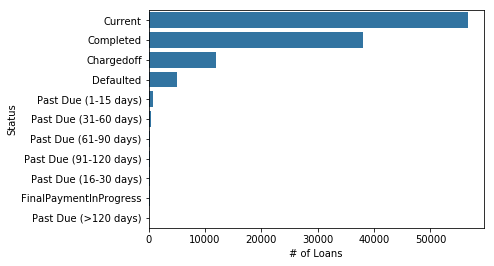

In [30]:
# Plot LoanStatus
default_color = sb.color_palette()[0]

# Order the categorical variable type
cat_order = loan_df['LoanStatus'].value_counts().index

sb.countplot(data = loan_df, y = 'LoanStatus', color = default_color, order=cat_order)
plt.xlabel('# of Loans')
plt.ylabel('Status');

In [60]:
# Check the percentage of loans in each status
pct_loans_by_status = pd.DataFrame(loan_df.groupby('LoanStatus')['LoanStatus'].count())
pct_loans_by_status['PctLoans'] = (pct_loans_by_status['LoanStatus']/pct_loans_by_status['LoanStatus'].sum())*100
pct_loans_by_status.sort_values(by='PctLoans', ascending=False)

,LoanStatus,PctLoans
LoanStatus,,
Current,56576,49.657691
Completed,38074,33.418179
Chargedoff,11992,10.525577
Defaulted,5018,4.404382
Past Due (1-15 days),806,0.707440
Past Due (31-60 days),363,0.318611
Past Due (61-90 days),313,0.274725
Past Due (91-120 days),304,0.266826
Past Due (16-30 days),265,0.232595


More than 80% of all Prosper loans are either current or completed. Among them, almost 50% are active and being paid by Prosper's borrowers. However, about 15% of Prosper's loans were charged-off or defaulted. 

During this analysis, we'll try to undercover which of the features listed above may contribute to 15% of charged-off and defaulted loans.

Let's first analyze the distribution of Prosper's borrowers risk.

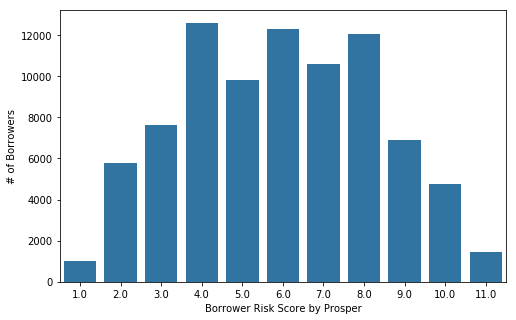

In [90]:
# Plot a standard-scaled plot for ProsperScore
binsize = 1
bins = np.arange(0, loan_df['ProsperScore'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
sb.countplot(data = loan_df, x = 'ProsperScore', color = default_color)
plt.xlabel('Borrower Risk Score by Prosper')
plt.ylabel('# of Borrowers');

Analyzing the distribution of all Prosper's borrowers risk, we noticed that most of the borrowers' risk scores are between 2 and 10 points. 

Let's continue our analysis and take a look at the debt to income ratio of all borrowers.

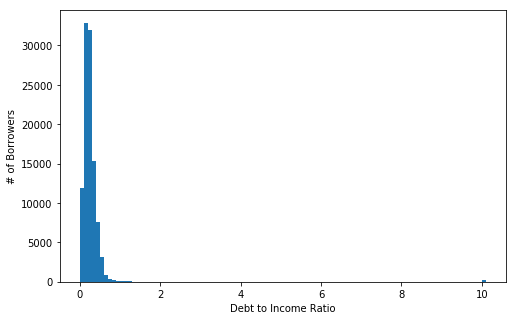

In [89]:
# Plot a standard-scaled plot for DebtToIncomeRatio
binsize = 0.1
bins = np.arange(0, loan_df['DebtToIncomeRatio'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan_df, x = 'DebtToIncomeRatio', bins = bins)
plt.xlabel('Debt to Income Ratio')
plt.ylabel('# of Borrowers');

The distribution above shows that most of Prosper's borrowers have a debt to income ratio between zero and 1.5. It's worth to zoom in this range to better analyze this feature.

It's also important to keep in mind that those borrowers with higher debt to income ratio should be analyzed since them can highlight what features can lead to a charged-off or defaulted loan.



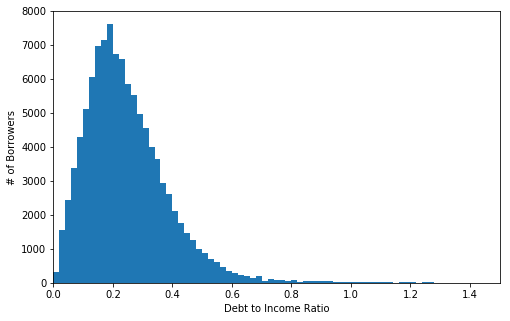

In [91]:
# Plot a standard-scaled plot for DebtToIncomeRatio
binsize = 0.02
bins = np.arange(0, loan_df['DebtToIncomeRatio'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan_df[loan_df['DebtToIncomeRatio'].notnull()], x = 'DebtToIncomeRatio', bins = bins)
plt.xlabel('Debt to Income Ratio')
plt.ylabel('# of Borrowers')
plt.xlim(0,1.5);

The zoomed distribution shows that few borrowers have a debt to income ratio more than 1. And its majority follow between 0 and 0.4. 

Moving on to analyze the distribution of open revolving accounts and current credit lines.

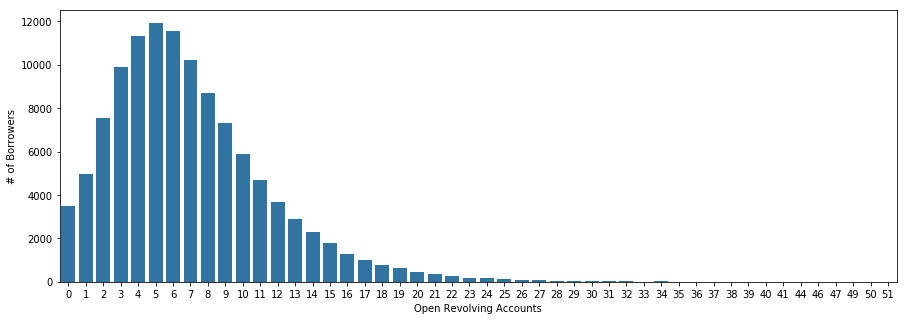

In [101]:
# Plot a standard-scaled plot for OpenRevolvingAccounts
plt.figure(figsize=[15, 5])

sb.countplot(data = loan_df, x = 'OpenRevolvingAccounts', color = default_color)
plt.xlabel('Open Revolving Accounts')
plt.ylabel('# of Borrowers');

Here we also can see that most borrowers have up to 15 revolving accounts. The remaining borrowers have an unsual number of revolving accounts, which should be analyzed to better undertand how it is related with loan statuses.

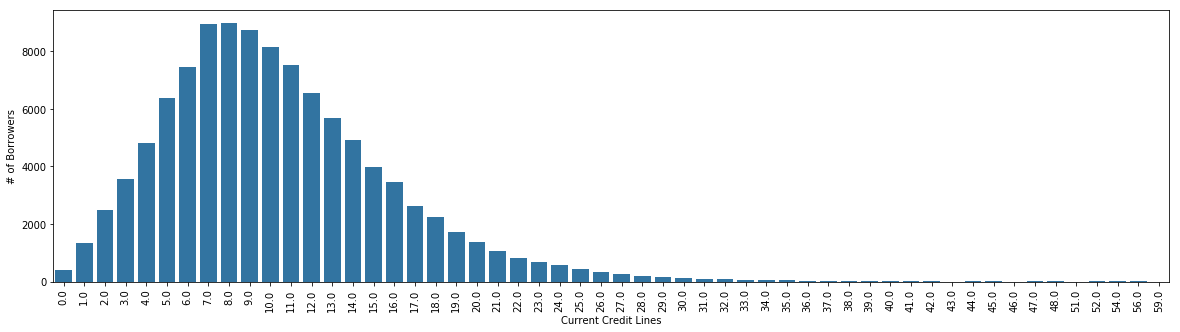

In [117]:
# Plot a standard-scaled plot for CurrentCreditLines
plt.subplots(figsize = [20,5])

sb.countplot(data = loan_df, x = 'CurrentCreditLines', color = default_color)
plt.xlabel('Current Credit Lines')
plt.ylabel('# of Borrowers')
plt.xticks(rotation=90);

Most of Prosper's borrowers have at least two current lines of credit. It would be interting to compare if loans statuses with number of current lines of credit.

Let's take a look at the distribution of listing categories. In other words, which type of loan has more borrowers:

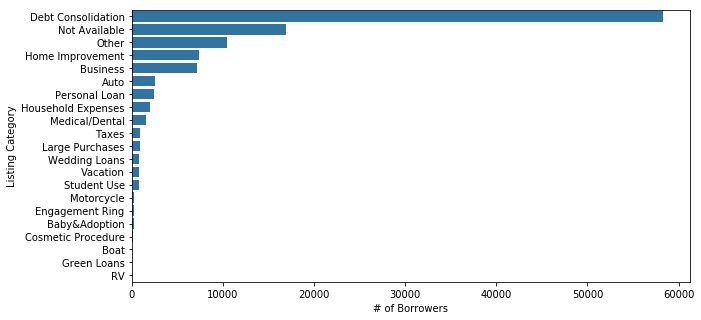

In [124]:
# Plot a standard-scaled plot for ListingCategory
plt.figure(figsize=[10, 5])

# Order the categorical variable type
cat_order = loan_df['ListingCategory'].value_counts().index

sb.countplot(data = loan_df, y = 'ListingCategory', color = default_color, order=cat_order)
plt.ylabel('Listing Category')
plt.xlabel('# of Borrowers');

No doubt that debt consolidation is the most popular type of listing/loan at Prosper. What we may want to know is if there is a particular listing which high number of charged-off or defaulted loans.

We'll now look at the remaining features selected for this analysis to see if any of them hold interesting properties.

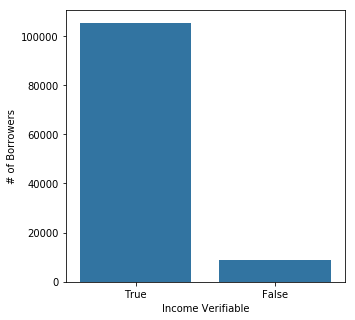

In [137]:
# Plot for IncomeVerifiable
plt.figure(figsize=[5, 5])

# Order the categorical variable type
cat_order = loan_df['IncomeVerifiable'].value_counts().index

sb.countplot(data = loan_df, x = 'IncomeVerifiable', color = default_color, order=cat_order)
plt.xlabel('Income Verifiable')
plt.ylabel('# of Borrowers');

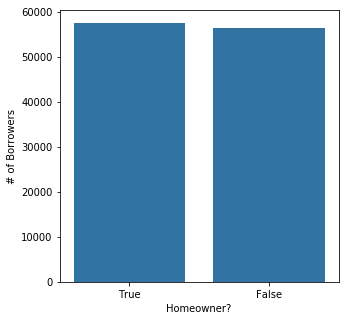

In [138]:
# Plot for IsBorrowerHomeowner
plt.figure(figsize=[5, 5])

# Order the categorical variable type
cat_order = loan_df['IsBorrowerHomeowner'].value_counts().index

sb.countplot(data = loan_df, x = 'IsBorrowerHomeowner', color = default_color, order=cat_order)
plt.xlabel('Homeowner?')
plt.ylabel('# of Borrowers');

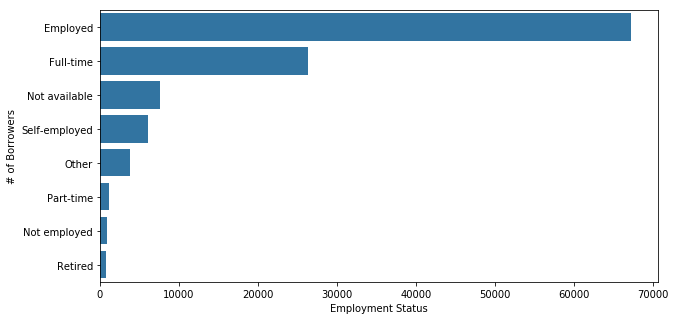

In [140]:
# Plot for EmploymentStatus
plt.figure(figsize=[10, 5])

# Order the categorical variable type
cat_order = loan_df['EmploymentStatus'].value_counts().index

sb.countplot(data = loan_df, y = 'EmploymentStatus', color = default_color, order=cat_order)
plt.xlabel('Employment Status')
plt.ylabel('# of Borrowers');

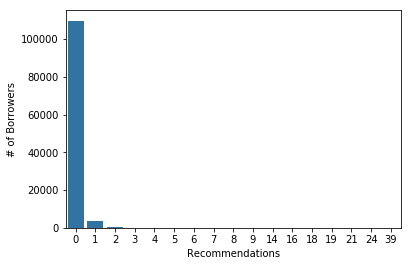

In [147]:
sb.countplot(data = loan_df, x = 'Recommendations', color = default_color)
plt.xlabel('Recommendations')
plt.ylabel('# of Borrowers');

In [148]:
loan_df.groupby('Recommendations')['Recommendations'].count()

Recommendations
0     109678
1       3516
2        568
3        108
4         26
5         14
6          4
7          5
8          3
9          6
14         1
16         2
18         2
19         1
21         1
24         1
39         1
Name: Recommendations, dtype: int64

It's interesting to noticed the majoroty of borrowers do not have any recommendation. Hence, this feature won't tell much about loan statuses.

The only feature not analyzed in this section was `EmploymentStatusDuration` because it only makes sense during the bivariante exploration convered in the next section of this notebook.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!